# FPGheArt - Week 4 exercise

### Lorenzo Buriola - 2021860
### Filippo Conforto - 2021856
### Lorenzo Domenichetti - 2011653


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

## Data loading and 3d visualization

In [2]:
data = np.loadtxt("DATA/data_t-SNE_310101_d5_R100_e1_N800.dat")

data = pd.DataFrame(data)
data.shape

(800, 5)

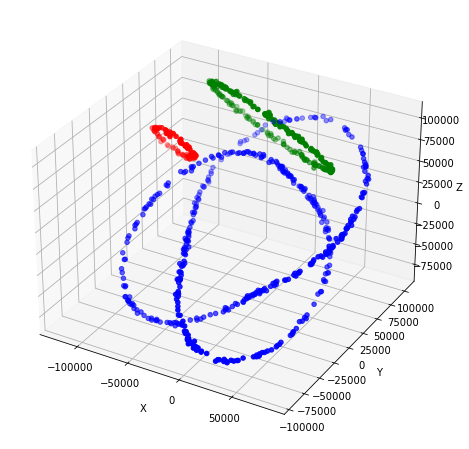

In [3]:
# Fixing random state for reproducibility
np.random.seed(12345)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(data.iloc[:80,0], data.iloc[:80,1], data.iloc[:80,2], marker='o', color = 'red')
ax.scatter(data.iloc[80:320,0], data.iloc[80:320,1], data.iloc[80:320,2], marker='o', color = 'green')
ax.scatter(data.iloc[320:,0], data.iloc[320:,1], data.iloc[320:,2], marker='o', color = 'blue')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

[[-100897.48415242   53600.95787939]
 [-130391.64253573   67402.32342782]
 [-108363.60213013   58131.77506101]
 ...
 [  85483.95001856  101489.6861241 ]
 [ -34477.97962161   -9810.33944984]
 [ 111336.45246834   29629.36770431]]


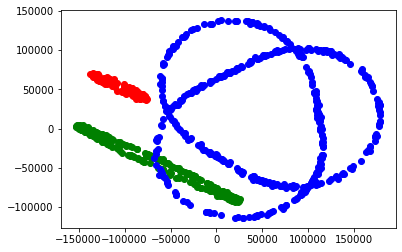

In [4]:
pca = PCA(n_components=2)
data_pca_twodim = pca.fit_transform(data)

print(data_pca_twodim)

plt.scatter(data_pca_twodim[:80,0], data_pca_twodim[:80,1] ,color = 'red')
plt.scatter(data_pca_twodim[80:320,0], data_pca_twodim[80:320,1] ,color = 'green')
plt.scatter(data_pca_twodim[320:,0], data_pca_twodim[320:,1], color = 'blue')
plt.show()

In [5]:
data_embedded_list = []
perplexities = [5,30,50,100]

for i in perplexities:
    data_embedded_list.append(TSNE(n_components=2, perplexity = i, init = 'random').fit_transform(data))
# data_embedded_30 = TSNE(n_components=2, perplexity = 100, init = 'random').fit_transform(data)
# data_embedded_30

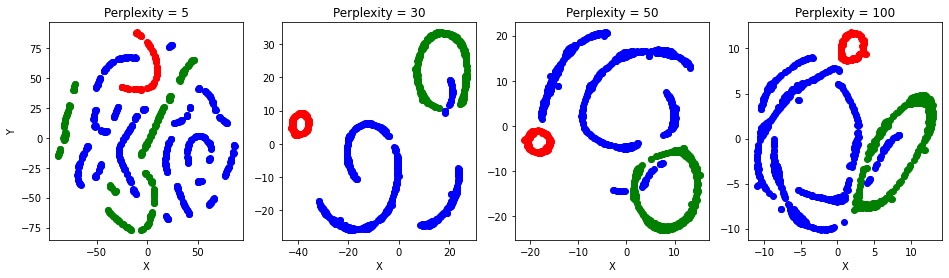

In [6]:
np.random.seed(12345)

fig,ax = plt.subplots(1,4,figsize = (16,4))


for i in range(4):
    
    ax[i].scatter(data_embedded_list[i][:80,0], data_embedded_list[i][:80,1], marker='o', color = 'red')
    ax[i].scatter(data_embedded_list[i][80:320,0], data_embedded_list[i][80:320,1], marker='o', color = 'green')
    ax[i].scatter(data_embedded_list[i][320:,0], data_embedded_list[i][320:,1], marker='o', color = 'blue')
    ax[i].set_xlabel('X')
    ax[i].set_title(f"Perplexity = {perplexities[i]}")
    
ax[0].set_ylabel('Y')
plt.show()

# plt.scatter(data_embedded_30[:80,0], data_embedded_30[:80,1] ,color = 'red')
# plt.scatter(data_embedded_30[80:320,0], data_embedded_30[80:320,1] ,color = 'green')
# plt.scatter(data_embedded_30[320:,0], data_embedded_30[320:,1], color = 'blue')
# plt.show()

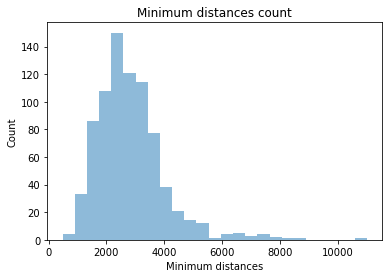

In [7]:
min_dist = []
for i in data.index:
    
    min_dist.append(np.sqrt(((data.drop(i)-data.loc[i])**2).sum(axis = 1).min()))

plt.hist(min_dist, bins = 25, alpha = 0.5)
plt.xlabel("Minimum distances")
plt.ylabel("Count")
plt.title("Minimum distances count")
plt.show()

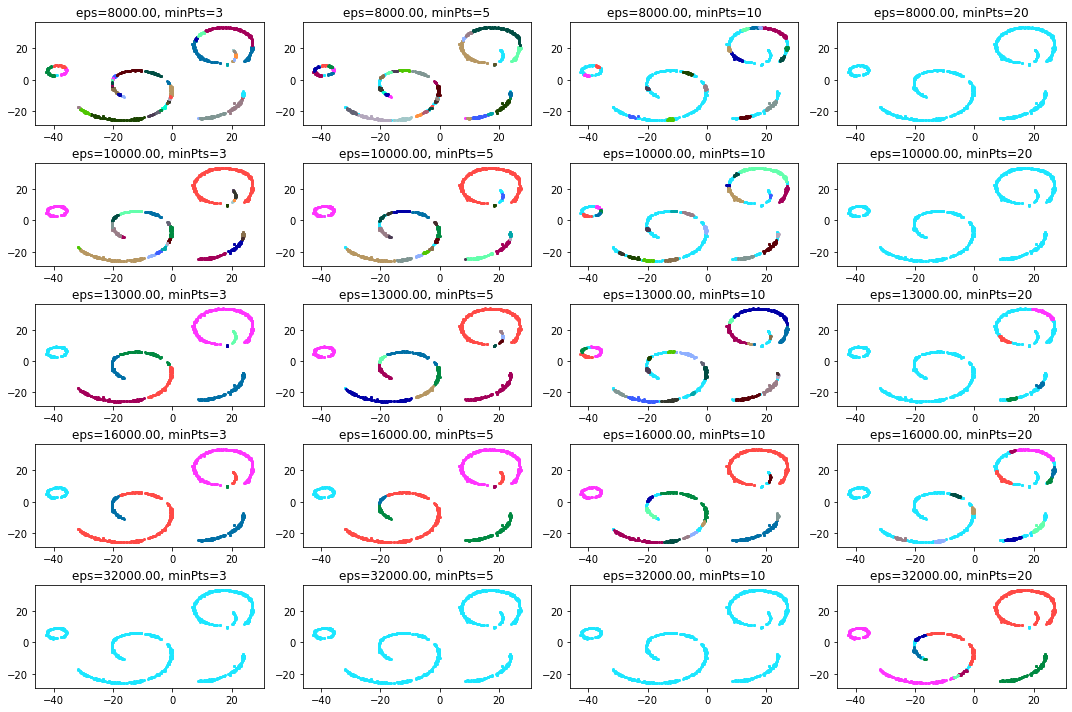

In [20]:
eps_range = [8000, 10000, 13000, 16000, 32000]
min_sample_range = [3,5,10,20]
cpalette = ["#1CE6FF", "#FF34FF", "#FF4A46","#008941", "#006FA6", "#A30059", "#0000A6", "#63FFAC","#B79762", "#004D43", "#8FB0FF", "#997D87","#5A0007", "#809693","#1B4400", "#4FC601", "#3B5DFF", "#4A3B53","#886F4C","#34362D", "#B4A8BD", "#00A6AA", "#452C2C","#636375", "#A3C8C9", "#FF913F", "#938A81","#575329", "#00FECF", "#B05B6F"]

def plotting_ax(X, y, ax):
    # plotting function
    for i, yu in enumerate(np.unique(y)):
        pos = (y == yu)
        ax.scatter(X[pos,0], X[pos,1], c=cpalette[i%len(cpalette)], s=4)
        
fig, ax = plt.subplots(len(eps_range),len(min_sample_range),figsize=(15,10))

for i, eps in enumerate(eps_range):
    for j, min_samples in enumerate(min_sample_range):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(data)
        y = model.labels_
        plotting_ax(data_embedded_list[1],y,ax[i,j])
        ax[i,j].set_title('eps=%.2f, minPts=%i'%(eps,min_samples))

#         nmi=NMI(y, ytrue)
#         ax[i,j].set_title('eps=%.2f, minPts=%i, nmi=%.2f'%(eps,min_samples,nmi))
plt.tight_layout(h_pad=0.5)
plt.show()